In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'palpebral-conjunctiva-to-detect-anaemia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1482148%2F2694817%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240503%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240503T135057Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D21caba1a6c4ff8cd3b279c2461b14abcc2150012f6e2e2f178dd5f165566226a74b1625c6098725e1a7d183b4422075af01d942561ea5a69f2826a9fa1b955f038118576c5e062c14003def0b4c0ec1a0183769801efad24b8f4c488f9b017209b67f7184da4b62fe83fcb893a56f7c23eb428c7e8b2bec9dd36a53d4d8338a3bc1d5d7f282d4a5fa7a5060385dd65502a4713a12ee8bc8a6a136e746119c13d6c8bb0312bef443943a1697657dca6b2a0293fdd025745abd15cc9f441c37dc8b8d91e81d8580841e51c1ac965c6915734f52354a5a5e3533df9cb3612981508bb473584ee1c5ea8ea89515541fd0fb3e4e55e727b9efd8e430d07d959cee985'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 32673783 bytes downloaded
Downloaded and uncompressed: palpebral-conjunctiva-to-detect-anaemia
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_1_136.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_1_145.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_1_110.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_2_33.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_2_87.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_1_10.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_2_8.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_1_158.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_1_14.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_2_20.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_1_126.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_2_66.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_2_89.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_2_29.jpg
/kaggle/input/palpebral-conjunctiva-to-detect-anaemia/img_

# Importing Libraries & dataset

In [3]:
import os
# Building deep learning models
import tensorflow as tf
from tensorflow import keras
# For accessing pre-trained models
import tensorflow_hub as hub
# For separating train and test sets
from sklearn.model_selection import train_test_split
# For Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

In [4]:
# Define the base directory where the images are stored
base_directory = '/kaggle/input/palpebral-conjunctiva-to-detect-anaemia'

# Preparing our data

In [5]:
# Initialize dictionaries
df_image = {'Anaemia':[],'Normal':[]}
df_labels = {'Anaemia':1,'Normal':0}

# Iterate through the image paths
for image_path in os.listdir(base_directory):
    # Check if the path corresponds to an image file
    if image_path.endswith('.jpg'):
        # Extract information from the file name
        _, label, _ = image_path.split('_')


        # Append the image path to the corresponding label in df_image
        if label=='1':
            label='Anaemia'
        elif label=='2':
            label='Normal'
        df_image[label].append(os.path.join(base_directory, image_path))



# Visualizing our data

#### Let's visualize the disribution of our data

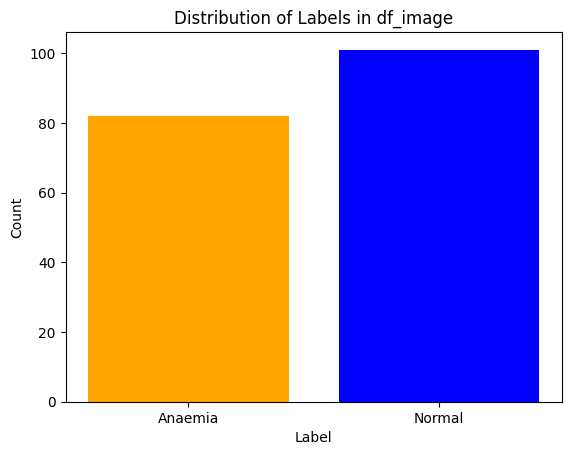

In [6]:
import matplotlib.pyplot as plt

# Get the keys and their corresponding counts
labels = list(df_image.keys())
counts = [len(df_image[key]) for key in labels]

# Creating a bar plot
plt.bar(labels, counts, color=['orange', 'blue'])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in df_image')
plt.show()

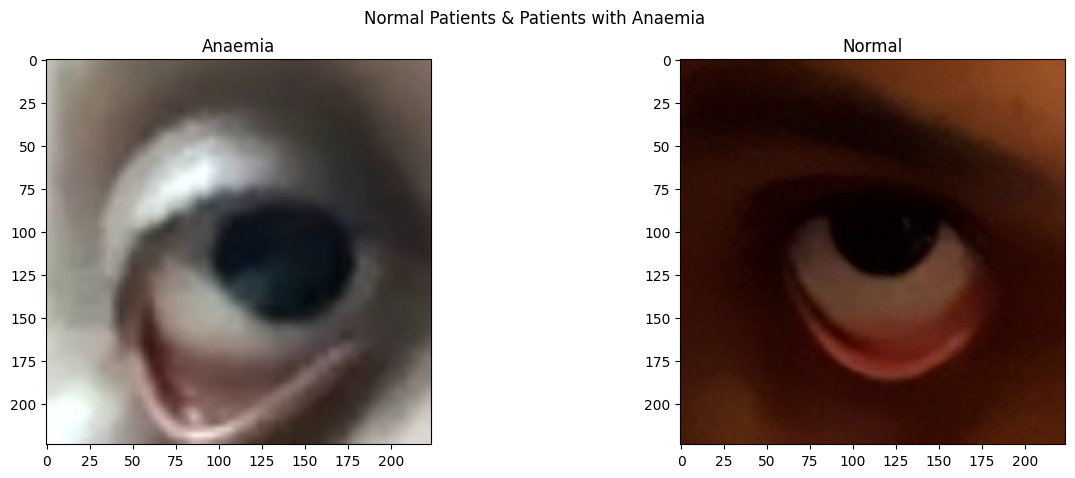

In [7]:
fig,ax=plt.subplots(ncols=2, figsize=(15,5))
fig.suptitle('Normal Patients & Patients with Anaemia ')
Anaemia=img.imread(df_image['Anaemia'][25])
Normal=img.imread(df_image['Normal'][40])


ax[0].set_title('Anaemia')
ax[1].set_title('Normal')

ax[0].imshow(Anaemia)
ax[1].imshow(Normal)

In [ ]:
Anaemia.shape

###  Spitting our data

In [8]:
X,y=[],[]

for label, images in df_image.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img, (224,224))
        X.append(resized_img)
        y.append(df_labels[label])

### Splitting & Standardizing our data

In [9]:
X=np.array(X)
X=X/255
y=np.array(y)

# Preparing and training our model

In [10]:
# Seperating data into training, test and validation sets

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.35)

In [11]:
len(X_test)

35

### As we have a really small dataset, we can use Data augmentation to get more date, so we have a more generalized model

In [12]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
# Generating augmented batches for training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

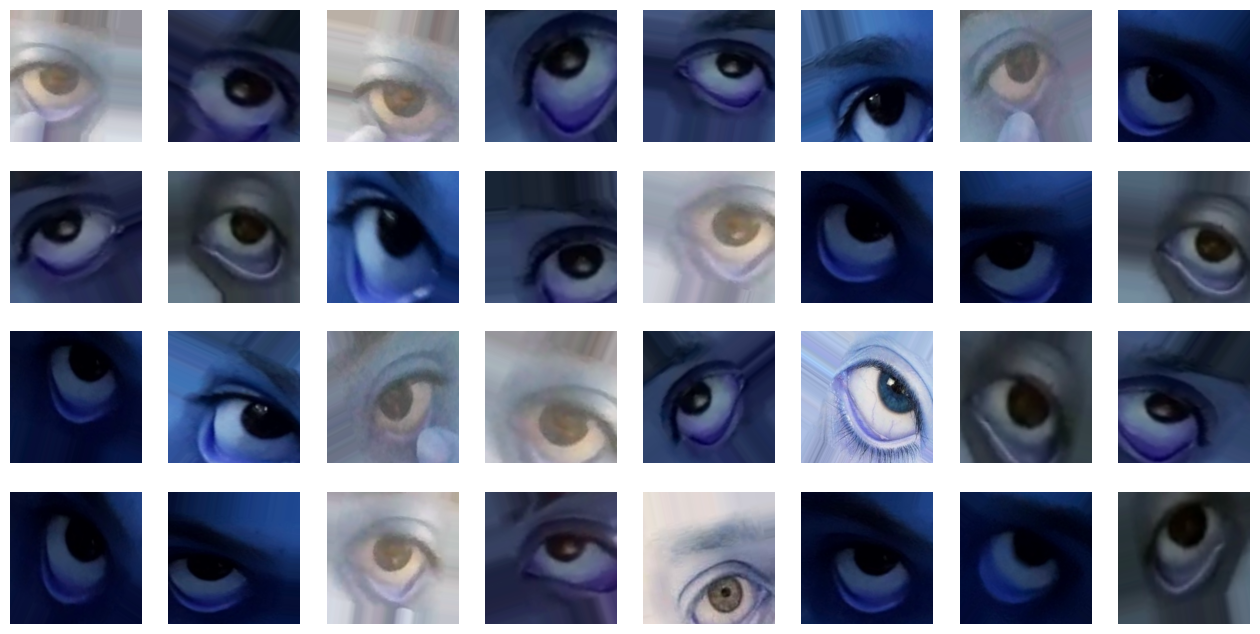

In [14]:

# Choose a batch from the generator
augmented_batch, _ = train_generator.next()

# Plot the augmented images
fig, axes = plt.subplots(4, 8, figsize=(16, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(augmented_batch[i])
    ax.axis('off')

plt.show()


### Let's use pretrained model MobileNetv2

In [15]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False)

In [16]:
num_label = 2 # number of labels

model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [17]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = model.fit(train_generator, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
4/4 [==============================] - 12s 1s/step - loss: 0.7555 - acc: 0.5625 - val_loss: 0.7138 - val_acc: 0.6000
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.4465 - acc: 0.8359 - val_loss: 0.4907 - val_acc: 0.9000
Epoch 3/10
4/4 [==============================] - 6s 1s/step - loss: 0.3082 - acc: 0.9297 - val_loss: 0.3543 - val_acc: 0.9500
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.2710 - acc: 0.8906 - val_loss: 0.2621 - val_acc: 0.9500
Epoch 5/10
4/4 [==============================] - 6s 1s/step - loss: 0.2058 - acc: 0.9062 - val_loss: 0.2052 - val_acc: 0.9500
Epoch 6/10
4/4 [==============================] - 6s 1s/step - loss: 0.1824 - acc: 0.9375 - val_loss: 0.1631 - val_acc: 0.9500
Epoch 7/10
4/4 [==============================] - 6s 1s/step - loss: 0.1401 - acc: 0.9375 - val_loss: 0.1342 - val_acc: 0.9500
Epoch 8/10
4/4 [==============================] - 6s 1s/step - loss: 0.1428 - acc: 0.9531 - val_loss: 0.1167 -

# Testing our model

In [18]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 1s 76ms/step - loss: 0.1056 - acc: 0.9714


[0.10562899708747864, 0.9714285731315613]

In [19]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

1/1 [==============================] - 4s 4s/step
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.95      0.97        19

    accuracy                           0.97        35
   macro avg       0.97      0.97      0.97        35
weighted avg       0.97      0.97      0.97        35



# Visualizing our model

In [20]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

In [21]:
loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Training and Evaluation Loss every Epoch', markers=True)
fig.show()